In [88]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
os.chdir(r"D:\Machinelearning\csv")
df=pd.read_csv("diabetes.csv")

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Understanding the dataset

In [90]:
df.shape

(768, 9)

In [91]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking for null values

In [93]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [94]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values present in the dataset

# Data Visualisation

Here we are going to plot :-
Count Plot :- to see if the dataset is balanced or not
Histograms :- to see if data is normally distributed or skewed
Box Plot :- to analyse the distribution and see the outliers
Scatter plots :- to understand relationship between any two variables
Pair plot :- to create scatter plot between all the variable

<AxesSubplot:xlabel='Outcome', ylabel='count'>

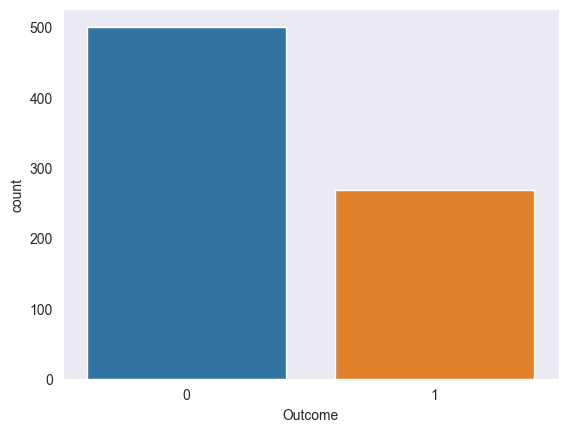

In [95]:
sns.countplot(x='Outcome',data=df)

The above plot shows that the dataset is imbalanced 

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

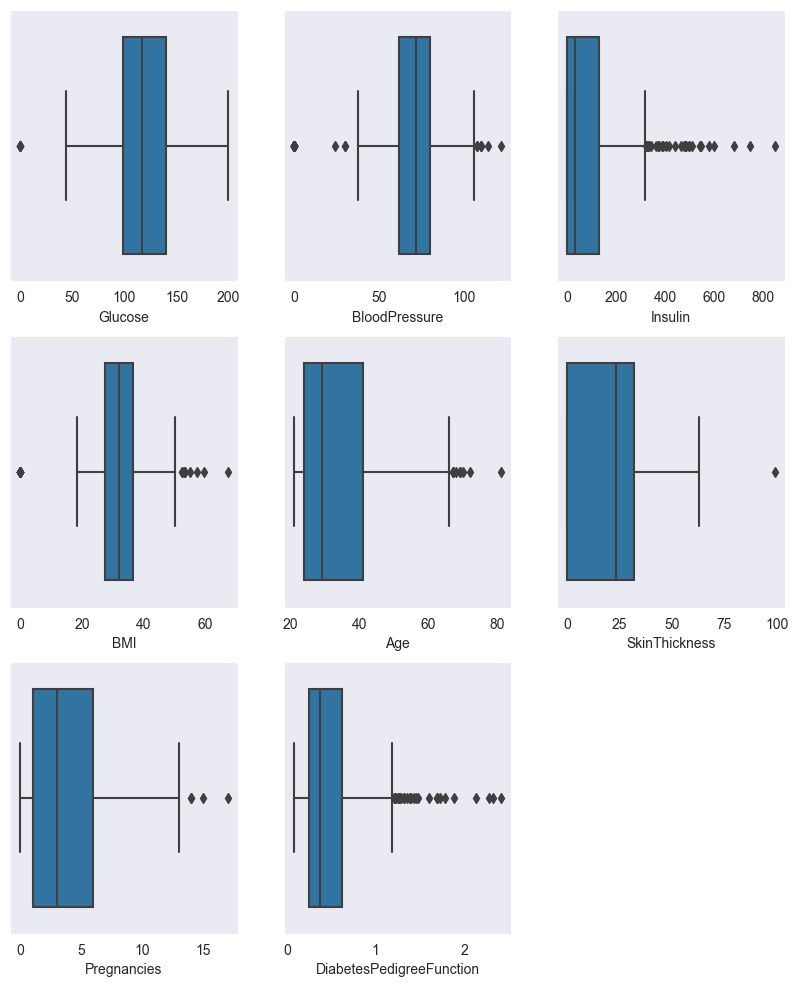

In [96]:
plt.figure(figsize=(10,12))
sns.set_style(style='dark')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

There are many outliers present in each column.
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

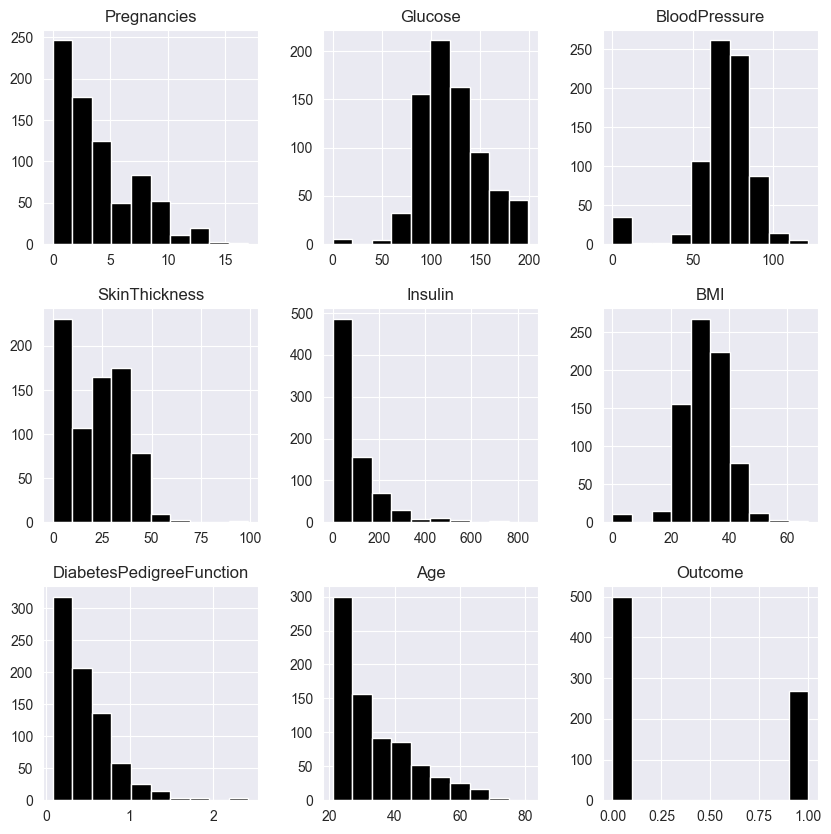

In [97]:
df.hist(bins=10,figsize=(10,10),color='black')
plt.show()

 We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

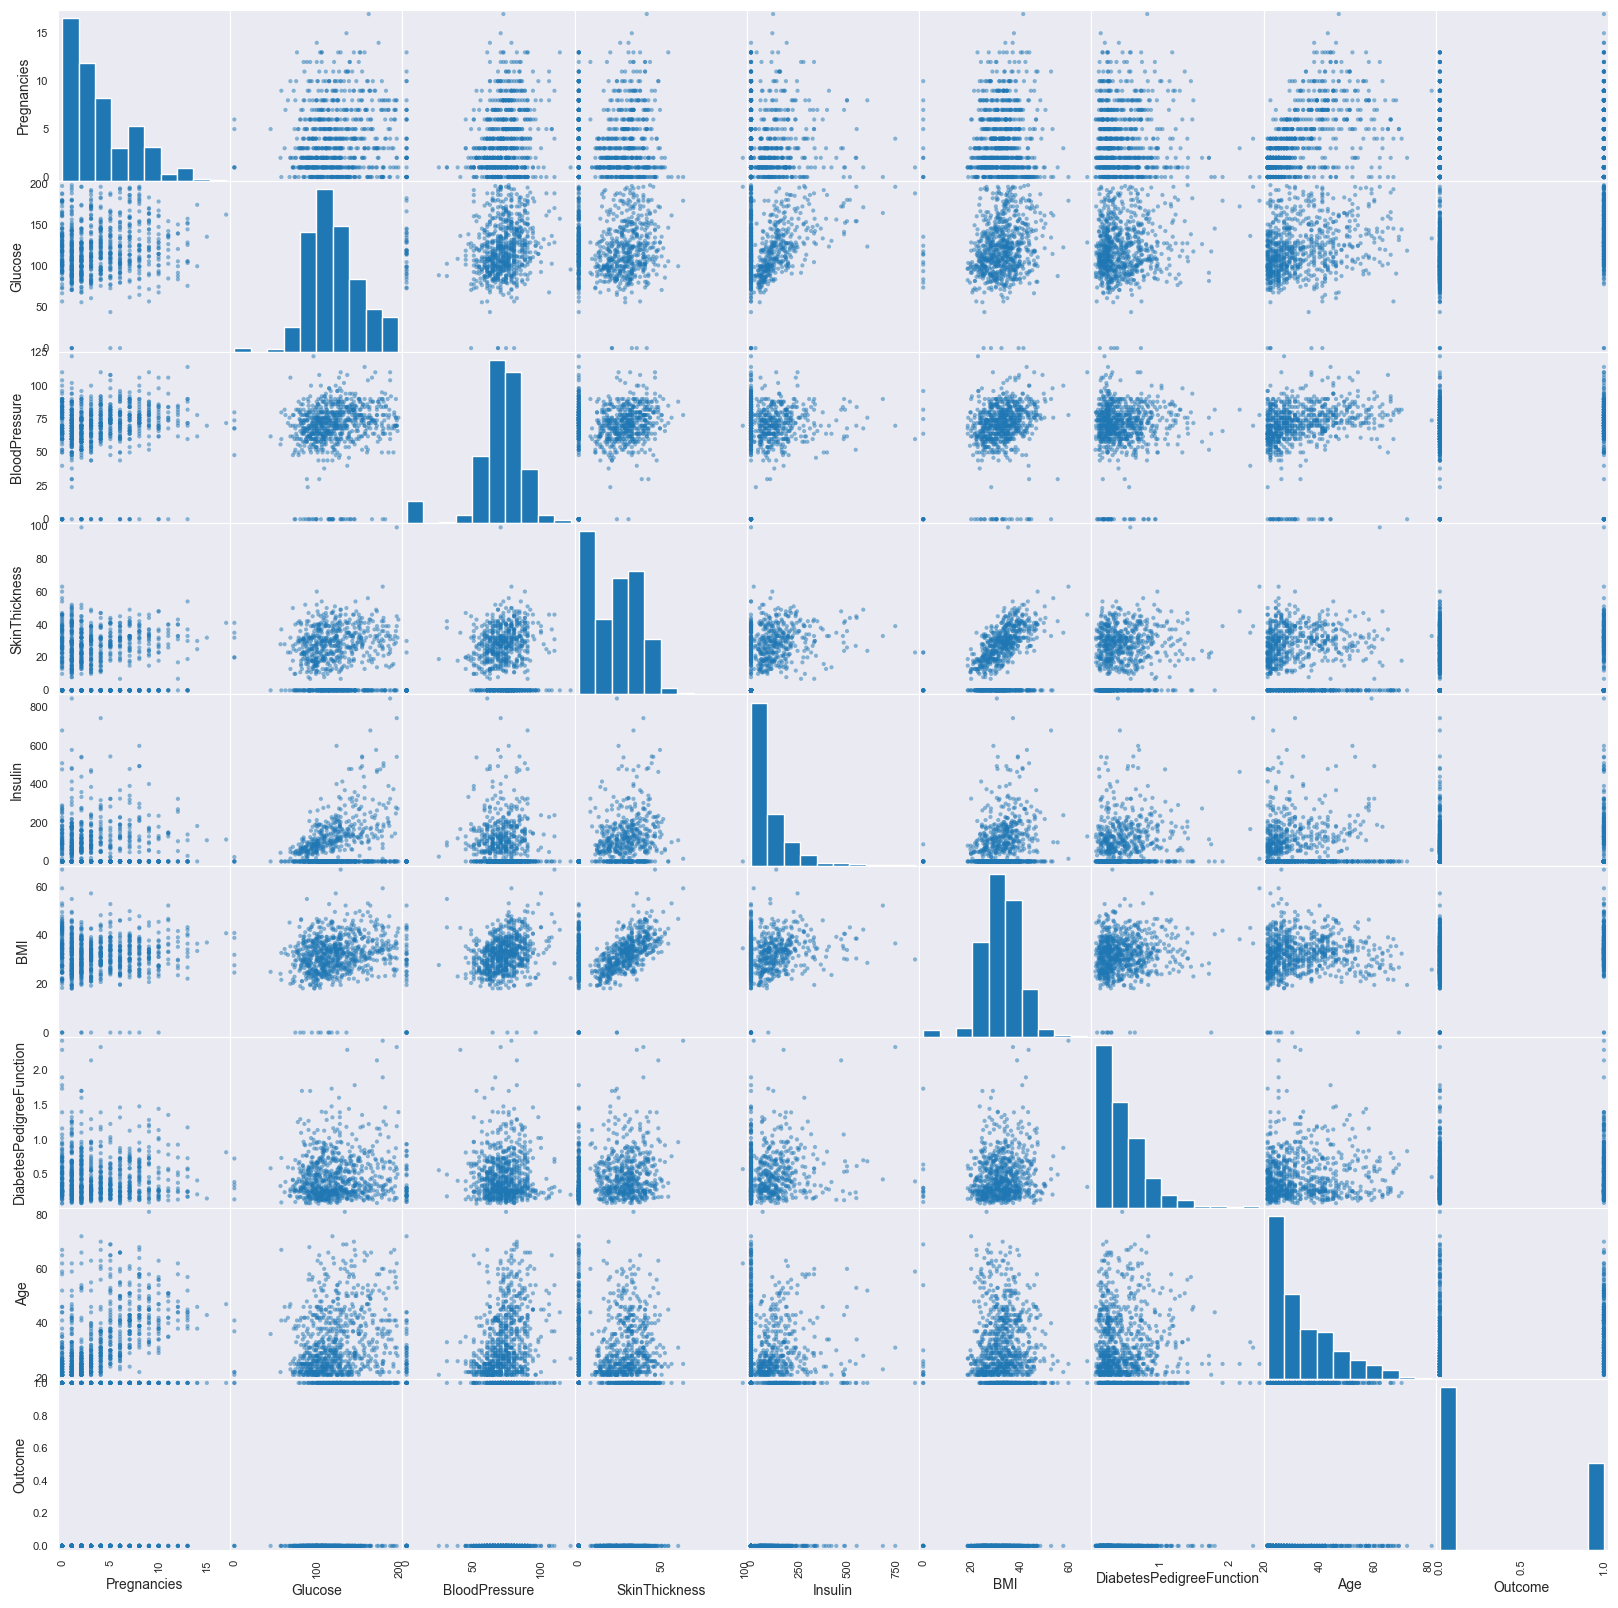

In [98]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

# Feature Selection

<AxesSubplot:>

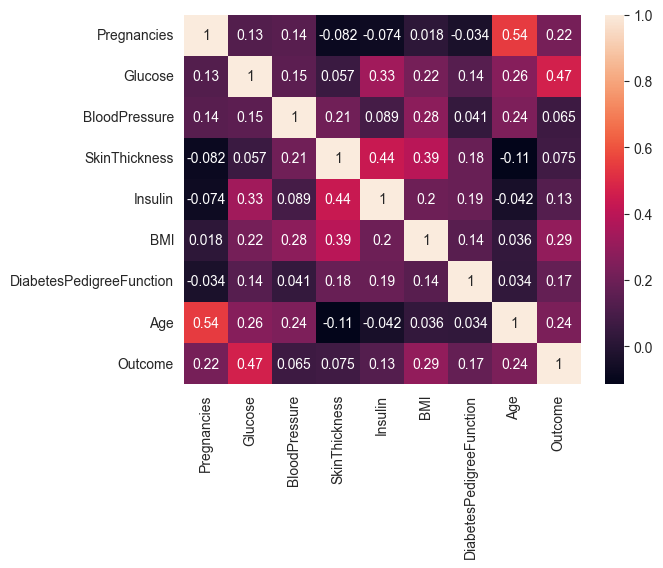

In [99]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

we can see the last column i.e.Outcome where the highest values correlated with other column are Glucose,SkinThickness,Age,Pregnancies

To identify the outliers present in dataset
Using Box plots
Using Scatter plot
Using Z score
I've used Box Plots above in data visualization step to detect outliers.

In [100]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction','SkinThickness'],axis='columns')

In [102]:
df_selected

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
...,...,...,...,...,...
763,10,101,32.9,63,0
764,2,122,36.8,27,0
765,5,121,26.2,30,0
766,1,126,30.1,47,1


In [123]:
from sklearn.preprocessing import QuantileTransformer
quantile=QuantileTransformer()
x=df_selected[['Glucose','BMI','Age','Pregnancies','Outcome']]
X=quantile.fit_transform(x)
df_new=quantile.transform(X)

C:\python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [124]:
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','BMI','Age','Outcome']

In [125]:
df_new

,Pregnancies,Glucose,BMI,Age,Outcome
0,0.810300,0.591265,0.889831,0.747718,1.0
1,0.097784,0.227510,0.558670,0.232725,0.0
2,0.956975,0.091917,0.585398,0.863755,1.0
3,0.131030,0.298566,0.000000,0.232725,0.0
4,0.721643,0.926988,0.606258,0.000000,1.0
...,...,...,...,...,...
763,0.284224,0.552803,0.976532,0.940678,0.0
764,0.561930,0.760756,0.411995,0.387223,0.0
765,0.549544,0.213168,0.529335,0.677966,0.0
766,0.619948,0.400261,0.867014,0.232725,1.0


<AxesSubplot:xlabel='Age'>

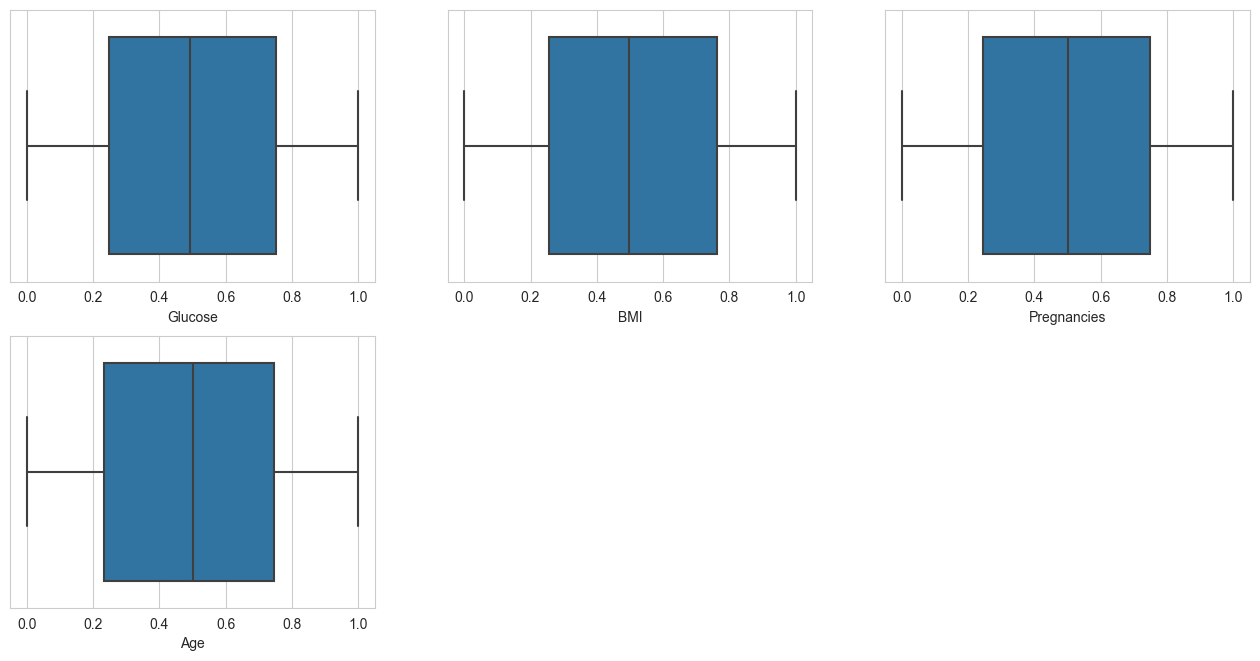

In [126]:
plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_selected)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_selected)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_selected)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_selected)

In [128]:
y=df_new['Outcome']

# Splitting the data for training and testing

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [130]:
X_train.shape,y_train.shape

((614, 5), (614,))

# Classifiction Algorithms

KNN
Naive Bayes
SVM
Decision Tree
Random Forest
Logistic Regression

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0,C=1)

In [143]:
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
gridsearch=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)

In [144]:
grid=gridsearch.fit(X_train,y_train)

In [145]:
gridsearch.best_params_

{'C': 1, 'kernel': 'linear'}

In [146]:
classifier.fit(X_train,y_train)

SVC(C=1, kernel='linear', random_state=0)

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [149]:
y_predicted=classifier.predict(X_test)

<AxesSubplot:>

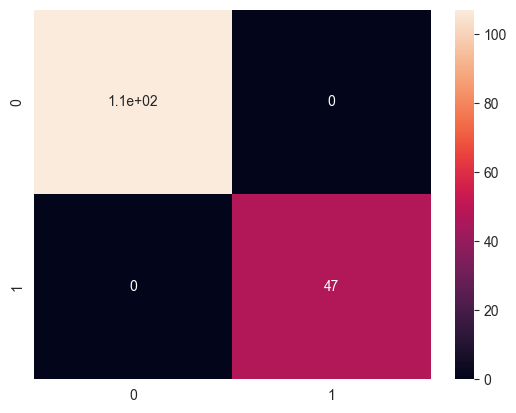

In [154]:
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True)

In [155]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predicted))

1.0


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [157]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [169]:
ylr=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154


 F1:
 1.0

 Precision score is:
 1.0

 Recall score is:
 1.0

 Confusion Matrix:



<AxesSubplot:>

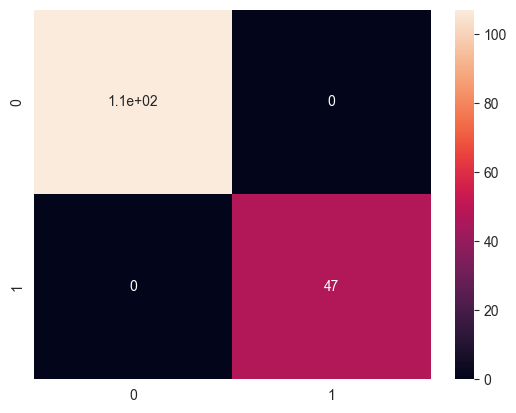

In [170]:
print("Classification Report is:\n",classification_report(y_test,ylr))
print("\n F1:\n",f1_score(y_test,ylr))
print("\n Precision score is:\n",precision_score(y_test,ylr))
print("\n Recall score is:\n",recall_score(y_test,ylr))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,ylr),annot=True)

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
dt = DecisionTreeClassifier(random_state=42)

In [165]:
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [166]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
best_model=grid_search.fit(X_train, y_train)
dt_pred=best_model.predict(X_test)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


Classification Report is:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154


 F1:
 1.0

 Precision score is:
 1.0

 Recall score is:
 1.0

 Confusion Matrix:



<AxesSubplot:>

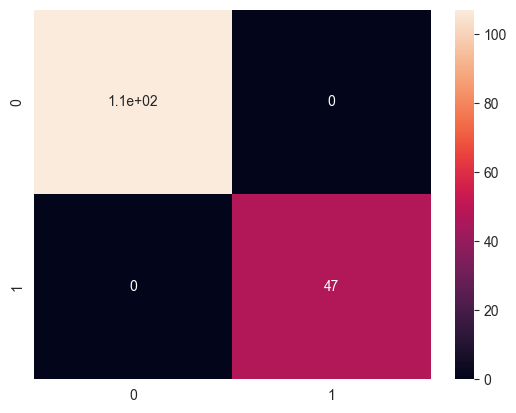

In [168]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

In [171]:
import pickle
filename='model.pkl'
pickle.dump(classifier,open(filename,'wb'))